In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [9]:
cust_data=pd.read_excel("D:\ALAB PROJECT\ML\market insight\CustomersData.xlsx")
discount_coup=pd.read_csv("D:\ALAB PROJECT\ML\market insight\Discount_Coupon.csv")
mrkt_spend=pd.read_csv("D:\ALAB PROJECT\ML\market insight\Marketing_Spend.csv")
online_sale=pd.read_csv("D:\ALAB PROJECT\ML\market insight\Online_Sales.csv")
tax_amt=pd.read_excel("D:\ALAB PROJECT\ML\market insight\Tax_amount.xlsx")

In [20]:
cust_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [22]:
discount_coup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              204 non-null    object
 1   Product_Category   204 non-null    object
 2   Coupon_Code        204 non-null    object
 3   Discount_pct       204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [23]:
mrkt_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [24]:
online_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  int64  
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.0+ MB


In [27]:
tax_amt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


## Q1 Calculate Invoice amount or sale_amount or revenue for each transaction and item level
##  Invoice Value =(( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges


In [16]:
online_sale.head()


Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status'],
      dtype='object')

In [15]:
discount_coup.head()




Month Product_Category  Coupon_Code  Discount_pct
0   Jan           Apparel      SALE10            10
1   Feb           Apparel      SALE20            20
2   Mar           Apparel      SALE30            30
3   Jan          Nest-USA      ELEC10            10
4   Feb          Nest-USA      ELEC20            20

In [20]:
online_sale['Transaction_Date'] = pd.to_datetime(online_sale['Transaction_Date'], format='%Y%m%d')
online_sale['Month'] = online_sale['Transaction_Date'].dt.strftime('%b')



In [21]:
discount_coup.columns=[col.strip() for col in discount_coup.columns]

In [24]:
result = pd.merge(online_sale, discount_coup, on=['Month', 'Product_Category'], how='left')
merged_df = pd.merge(result,tax_amt,on=['Product_Category'], how = 'left')

merged_df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Month Coupon_Code  \
0         1     153.71               6.5          Used   Jan      ELEC10   
1         1     153.71               6.5          Used   Jan      ELEC10   
2         1       2.05               6.5          Used   Jan       OFF10   
3         5      17.53               6.5      Not Used   Jan      SALE10   
4         1      16.50               6.5          Used   Jan       AIO10   

   Discount_pct   GST  
0          10.0  0.10  
1          10.0  0.10  
2          10.0  0.10  
3          10.0  0.18  
4          10.0  0.18

In [25]:
merged_df['Coupon_Code'].fillna('Not Available',inplace=True)
merged_df['Discount_pct'].fillna(0, inplace=True)

In [26]:
merged_df['Invoice'] = np.where(
    merged_df['Coupon_Status'] == 'Used',
    ((merged_df['Quantity'] * merged_df['Avg_Price']) * (1 - merged_df['Discount_pct']/100) * (1 + merged_df['GST'])) + merged_df['Delivery_Charges'],
    ((merged_df['Quantity'] * merged_df['Avg_Price']) * (1 + merged_df['GST'])) + merged_df['Delivery_Charges']
)

## 2. Perform Detailed exploratory analysis¶
## Understanding how many customers acquired every month
## Understand the retention of customers on a month-on-month basis
## How the revenues from existing/new customers on a month-on-month basis
## How the discounts play a role in the revenues
## Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day, etc.
## Understand the trends/seasonality of sales by category, location, month, etc.
## How the number of orders varies and sales with different days
## Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month
## How marketing spend is impacting on revenue
## Which product appeared in the transactions
## Which product was purchased mostly based on the quantity

In [30]:
##Understanding how many customers acquired every month
merged_df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Month Coupon_Code  \
0         1     153.71               6.5          Used   Jan      ELEC10   
1         1     153.71               6.5          Used   Jan      ELEC10   
2         1       2.05               6.5          Used   Jan       OFF10   
3         5      17.53               6.5      Not Used   Jan      SALE10   
4         1      16.50               6.5          Used   Jan       AIO10   

   Discount_pct   GST   Invoice  
0          10.0  0.10  158.6729  
1          10.0  0.10  158.6729  
2          10.0  0.10    8.5295  
3          10.0  0.18  109.9270  
4          10.0  0.18   24.0230

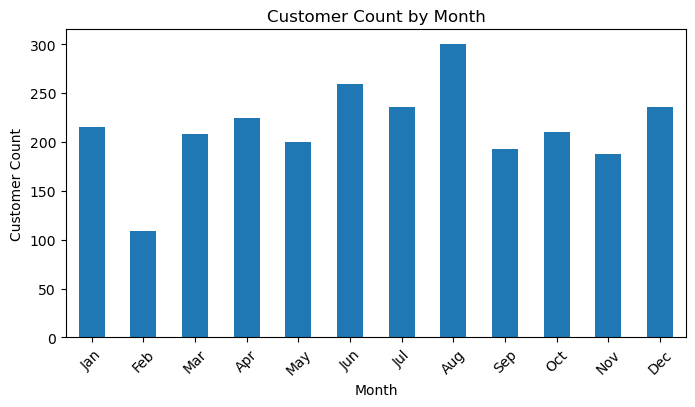

In [31]:

merged_df['Month2'] = pd.to_datetime(merged_df['Month'], format='%b')
merged_df.groupby('Month2')['CustomerID'].count()
customer_count_by_month = merged_df.groupby('Month2')['CustomerID'].nunique()


plt.figure(figsize=(8, 4))
customer_count_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Customer Count')
plt.title('Customer Count by Month')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

In [32]:
##Understand the retention of customers on a month-on-month basis
month_dict = {}
for i in merged_df['Month'].unique():
   month_dict[i] = merged_df[merged_df['Month']==i]['CustomerID'].unique().tolist()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
retention = [0]
for i in range(11):
  set1 = set(month_dict[months[i]])
  set2 = set(month_dict[months[i+1]])
  common_items = len(set1.intersection(set2))
  retention.append(common_items)

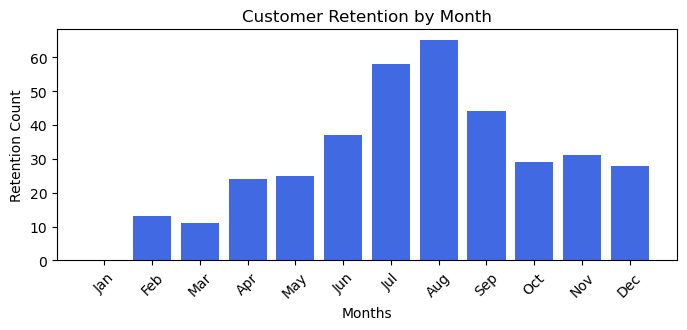

In [33]:
plt.figure(figsize=(8, 3))
plt.bar(months, retention, color='royalblue')
plt.xlabel('Months')
plt.ylabel('Retention Count')
plt.title('Customer Retention by Month')
plt.xticks(rotation=45)
plt.show()

In [35]:
# How the revenues from existing/new customers on a month-on-month basis
temp = []
new_cust_each_month = {}
existing_cust_each_month = {}

no_of_new_cust_each_month = {}
no_of_existing_cust_each_month = {}

for i in merged_df['Month'].unique():
   x = merged_df[merged_df['Month']==i]['CustomerID'].unique().tolist()
   new_cust = [value for value in x if value not in temp]
   existing_cust = [value for value in x if value in temp]
   temp.extend(x)
   temp = list(set(temp))
   new_cust_each_month[i] = new_cust
   existing_cust_each_month[i] = existing_cust
   no_of_new_cust_each_month = len(new_cust)
   no_of_existing_cust_each_month = len(existing_cust)

In [36]:
new_cust_each_month_revenue = {}
existing_cust_each_month_revenue = {}

for month, ids in new_cust_each_month.items():
    new_cust_each_month_revenue[month] = merged_df[(merged_df['Month'] == month) & (merged_df['CustomerID'].isin(ids))]['Invoice'].sum()

for month, ids in existing_cust_each_month.items():
    existing_cust_each_month_revenue[month] = merged_df[(merged_df['Month'] == month) & (merged_df['CustomerID'].isin(ids))]['Invoice'].sum()

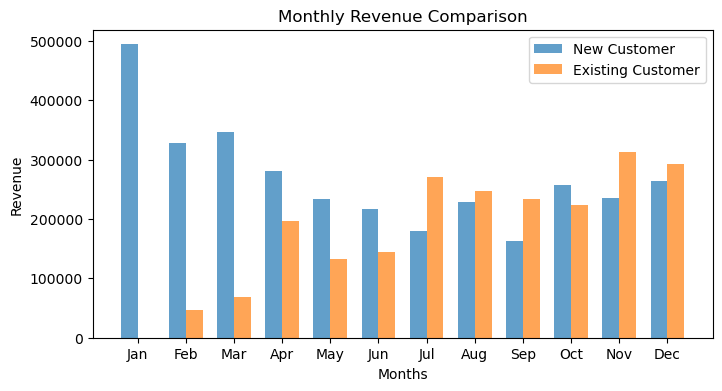

In [37]:
months = list(existing_cust_each_month_revenue.keys())
new_cust = list(new_cust_each_month_revenue.values())
existing_cust = list(existing_cust_each_month_revenue.values())

plt.figure(figsize=(8, 4))
bar_width = 0.35
bar_positions = range(len(months))

plt.bar(bar_positions, new_cust, width=bar_width, label='New Customer', alpha=0.7)
plt.bar([pos + bar_width for pos in bar_positions], existing_cust, width=bar_width, label='Existing Customer', alpha=0.7)

plt.xlabel('Months')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Comparison')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], months)
plt.legend()
plt.show()

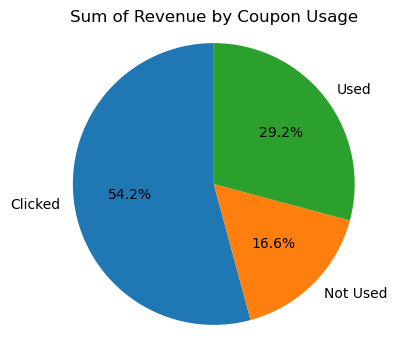

In [38]:
##How the discounts play a role in the revenues
grouped = merged_df.groupby('Coupon_Status')['Invoice'].sum()

# Create a pie chart
plt.figure(figsize=(4,4))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.title('Sum of Revenue by Coupon Usage')

plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'GGOEGGOA017399'),
  Text(1, 0, 'GGOEGDHC018299'),
  Text(2, 0, 'GGOEGBMJ013399'),
  Text(3, 0, 'GGOEGOLC014299'),
  Text(4, 0, 'GGOEGFKQ020399'),
  Text(5, 0, 'GGOEGFSR022099'),
  Text(6, 0, 'GGOENEBQ078999'),
  Text(7, 0, 'GGOEGFYQ016599'),
  Text(8, 0, 'GGOEGOAQ012899'),
  Text(9, 0, 'GGOENEBJ079499')])

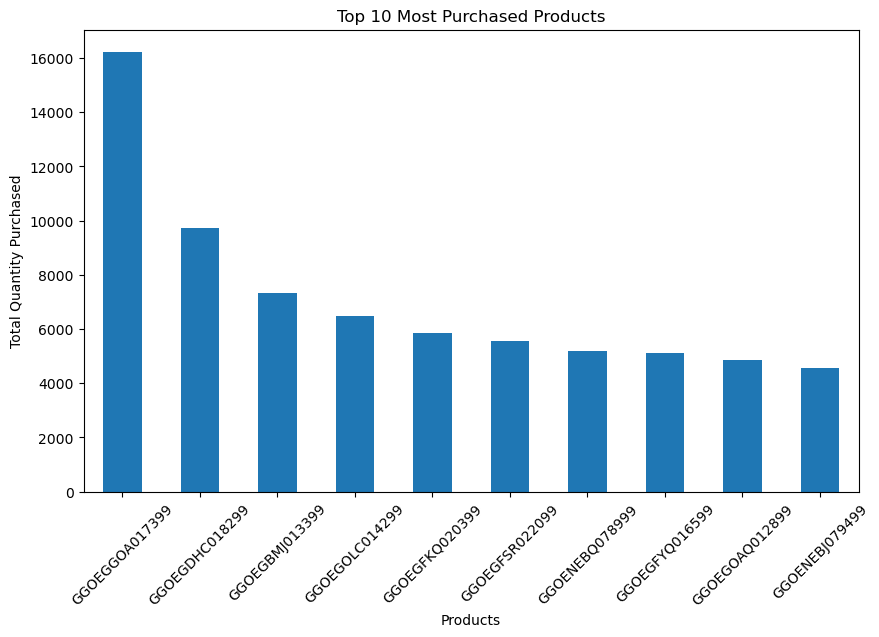

In [39]:
## Which product was purchased mostly based on the quantity
category_quantity = merged_df.groupby('Product_SKU')['Quantity'].sum()

# Find the category with the highest total quantity
top_10_categories = category_quantity.sort_values(ascending=False).head(10)

# Create a bar chart for the top 10 products
plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar')
plt.xlabel('Products')
plt.ylabel('Total Quantity Purchased')
plt.title('Top 10 Most Purchased Products')
plt.xticks(rotation=45)

In [41]:
top10 = top_10_categories.reset_index()
filtered_df = merged_df[merged_df['Product_SKU'].isin(top10['Product_SKU'])]

# Group by 'product_id' and calculate summary statistics
summary_stats = filtered_df.groupby('Product_SKU').agg({
    'Product_Description': 'first',
    'Product_Category': 'first'  ,
     'Quantity': 'sum',
    'Invoice': 'sum'
}).reset_index()
summary_stats.columns = ['Product ID', 'Product Description', 'Product Category','Quantity','Revenue']

# Display the summary statistics DataFrame
summary_stats

Product ID                                Product Description  \
0  GGOEGBMJ013399                                          Sport Bag   
1  GGOEGDHC018299                          Google 22 oz Water Bottle   
2  GGOEGFKQ020399              Google Laptop and Cell Phone Stickers   
3  GGOEGFSR022099                                   Google Kick Ball   
4  GGOEGFYQ016599                         Foam Can and Bottle Cooler   
5  GGOEGGOA017399                                           Maze Pen   
6  GGOEGOAQ012899                            Ballpoint LED Light Pen   
7  GGOEGOLC014299                       Google Metallic Notebook Set   
8  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   
9  GGOENEBQ078999             Nest Cam Outdoor Security Camera - USA   

  Product Category  Quantity       Revenue  
0             Bags      7321   42068.25962  
1        Drinkware      9728   37418.94532  
2           Office      5847   24533.63450  
3        Lifestyle      5549   15676.89884  
4        Drinkware      5098   11559.08054  
5           Office     16234   19786.07210  
6           Office      4861   15697.98510  
7           Office      6496   41481.37750  
8         Nest-USA      4570  731870.69120  
9         Nest-USA      5206  671620.06650

In [42]:
# "Analyze key performance indicators (KPIs) such as revenue, order count, average order value, customer count (existing and new),
# and quantity, sorted by category, month, week, and day. Simplify this as:

# Top 5 categories by revenue and quantity.
# Top 5 revenue days.
# Top 5 revenue weeks.
# Top 2 revenue months."

In [43]:
merged_df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Month Coupon_Code  \
0         1     153.71               6.5          Used   Jan      ELEC10   
1         1     153.71               6.5          Used   Jan      ELEC10   
2         1       2.05               6.5          Used   Jan       OFF10   
3         5      17.53               6.5      Not Used   Jan      SALE10   
4         1      16.50               6.5          Used   Jan       AIO10   

   Discount_pct   GST   Invoice     Month2  
0          10.0  0.10  158.6729 1900-01-01  
1          10.0  0.10  158.6729 1900-01-01  
2          10.0  0.10    8.5295 1900-01-01  
3          10.0  0.18  109.9270 1900-01-01  
4          10.0  0.18   24.0230 1900-01-01

In [44]:
top_categories_Invoice = merged_df.groupby('Product_Category').agg({'Invoice': 'sum', 'Quantity': 'sum'}).nlargest(5, 'Invoice')

top_categories_Quantity = merged_df.groupby('Product_Category').agg({'Invoice': 'sum', 'Quantity': 'sum'}).nlargest(5, 'Quantity')

top_categories_Quantity

Invoice  Quantity
Product_Category                        
Office            3.819453e+05     88383
Apparel           8.278292e+05     32438
Drinkware         2.726220e+05     30501
Lifestyle         1.252760e+05     24881
Nest-USA          2.721646e+06     21430

In [45]:
# Top 5 revenue days
merged_df['Date'] = merged_df['Transaction_Date'].dt.date
top_days = merged_df.groupby('Date')['Invoice'].sum().nlargest(5)
print("\nTop 5 revenue days:")
top_days


Top 5 revenue days:


Date
2019-04-05    59951.48052
2019-11-27    56662.02888
2019-04-18    54471.40715
2019-07-18    42947.02071
2019-08-02    40533.19244
Name: Invoice, dtype: float64

In [46]:
# Top 5 revenue weeks
merged_df['Week'] = merged_df['Transaction_Date'].dt.strftime('%Y-%U')
top_weeks = merged_df.groupby('Week')['Invoice'].sum().nlargest(5)
print("\nTop 5 revenue weeks:")
print(top_weeks)


Top 5 revenue weeks:
Week
2019-47    171552.61754
2019-50    159533.68695
2019-49    151547.43730
2019-15    138720.69510
2019-48    135702.55428
Name: Invoice, dtype: float64


In [47]:
# Top 2 revenue months
top_months = merged_df.groupby('Month2')['Invoice'].sum().nlargest(2)
print("\nTop 2 revenue months:")
print(top_months)

# Replace ['Invoice'].sum() to ['Transaction_ID'].nunique() to find based on number of orders


Top 2 revenue months:
Month2
1900-12-01    556112.29179
1900-11-01    547788.12626
Name: Invoice, dtype: float64


In [48]:
# Understand the trends/seasonality of sales by category, location, month, etc.
# How the number of orders varies and sales with different days

In [49]:
merged_df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Month Coupon_Code  \
0         1     153.71               6.5          Used   Jan      ELEC10   
1         1     153.71               6.5          Used   Jan      ELEC10   
2         1       2.05               6.5          Used   Jan       OFF10   
3         5      17.53               6.5      Not Used   Jan      SALE10   
4         1      16.50               6.5          Used   Jan       AIO10   

   Discount_pct   GST   Invoice     Month2        Date     Week  
0          10.0  0.10  158.6729 1900-01-01  2019-01-01  2019-00  
1          10.0  0.10  158.6729 1900-01-01  2019-01-01  2019-00  
2          10.0  0.10    8.5295 1900-01-01  2019-01-01  2019-00  
3          10.0  0.18  109.9270 1900-01-01  2019-01-01  2019-00  
4          10.0  0.18   24.0230 1900-01-01  2019-01-01  2019-00

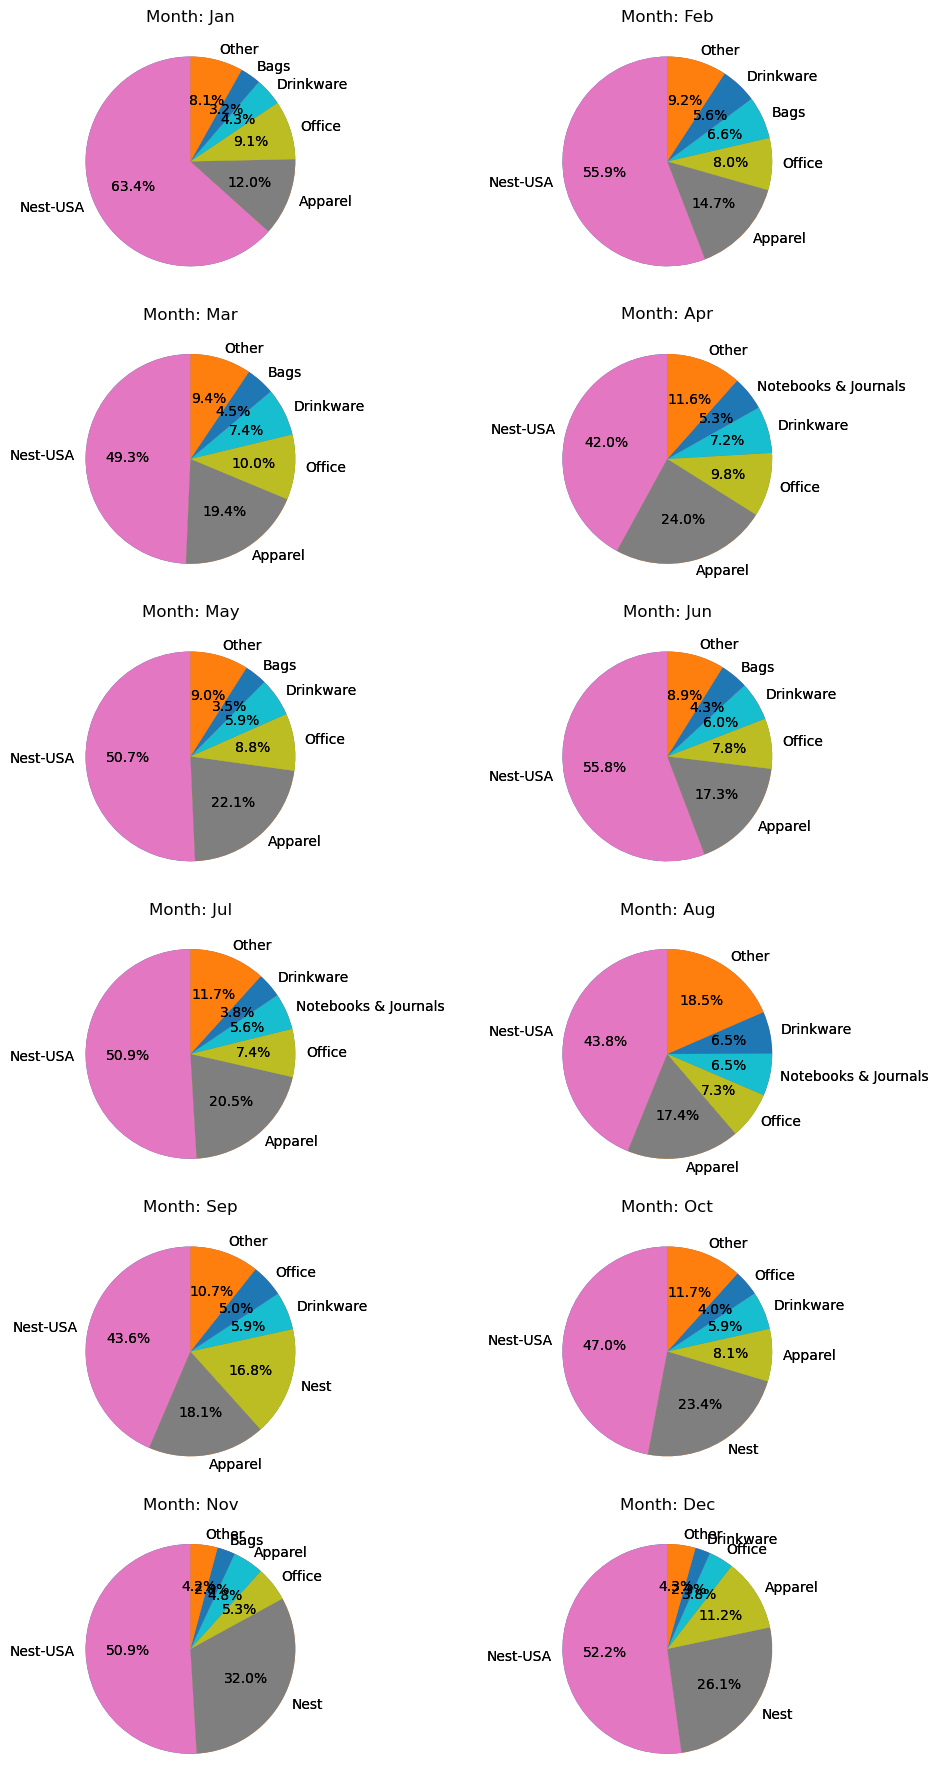

In [50]:
months = merged_df['Month'].unique()
categories = merged_df['Product_Category'].unique()

# Create a grid of pie charts
num_rows = int(len(months)/2)
num_cols = 2  # Adjust as needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
categories_to_show = 5

for i, month in enumerate(months):
    month_data = merged_df[merged_df['Month'] == month]
    total_invoice = month_data.groupby('Product_Category')['Invoice'].sum()
    total_invoice = total_invoice.sort_values(ascending=False)  # Sort the total_invoice

    if len(total_invoice) > categories_to_show:
      other_sum = total_invoice.iloc[categories_to_show:].sum()
      total_invoice = total_invoice.iloc[:categories_to_show]
      total_invoice['Other'] = other_sum

    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] # Access the subplot using [i, 0]

    ax.pie(total_invoice, labels=total_invoice.index, autopct='%1.1f%%', startangle=90)

    ax.pie(total_invoice, labels=total_invoice.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Month: {month}')
plt.tight_layout()
plt.show()    

In [51]:
# Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month

mrkt_spend['Date'] = pd.to_datetime(mrkt_spend['Date'], format='%m/%d/%Y')
mrkt_spend['Month'] = mrkt_spend['Date'].dt.strftime('%b')
mrkt_spend['total_spend'] = mrkt_spend['Offline_Spend'] + mrkt_spend['Online_Spend']

x = mrkt_spend.groupby('Month')['total_spend'].sum().reset_index()
y = merged_df.groupby('Month')['Invoice'].sum().reset_index()
z = merged_df.groupby('Month')['Discount_pct'].mean().reset_index()
tax = merged_df.groupby('Month')['GST'].mean().reset_index()
deli_charg = merged_df.groupby('Month')['Delivery_Charges'].sum().reset_index()

result = x.merge(y, on='Month', how='inner')
result = result.merge(z, on='Month', how='inner')
result = result.merge(tax, on='Month', how='inner')
result = result.merge(deli_charg, on='Month', how='inner')

result['market_spend_%'] = (result['total_spend']*100)/result['Invoice']
result['Delivery_Charges_%'] = (result['Delivery_Charges']*100)/result['Invoice']

result

Month  total_spend       Invoice  Discount_pct       GST  Delivery_Charges  \
0    Apr    157026.83  477498.59102      9.874699  0.142545          41481.74   
1    Aug    142904.15  475796.87554     19.876423  0.148522          61099.57   
2    Dec    198648.75  556112.29179     30.000000  0.121919          37881.99   
3    Feb    137107.92  375162.04730     19.762485  0.136114          49216.60   
4    Jan    154928.95  494090.54875      9.901551  0.131691          59242.32   
5    Jul    120217.85  451878.40904      9.895258  0.144870          48723.93   
6    Jun    134318.14  361000.17429     29.756737  0.143203          37513.58   
7    Mar    122250.09  415157.79044     29.613438  0.141742          60799.94   
8    May    118259.64  365596.02956     19.755031  0.144845          41396.17   
9    Nov    161144.96  547788.12626     19.979803  0.116425          32311.93   
10   Oct    151224.65  480767.36981      9.973583  0.130043          45961.88   
11   Sep    135514.54  396510.49254     29.895056  0.139240          41005.42   

    market_spend_%  Delivery_Charges_%  
0        32.885297            8.687301  
1        30.034697           12.841524  
2        35.720978            6.811932  
3        36.546319           13.118758  
4        31.356388           11.990175  
5        26.604026           10.782531  
6        37.207223           10.391568  
7        29.446657           14.645020  
8        32.347080           11.322927  
9        29.417388            5.898618  
10       31.454849            9.560108  
11       34.176785           10.341572

In [52]:
# How marketing spend is impacting on revenue

correlation = result['total_spend'].corr(result['Invoice'])

print(f'Correlation between market_spend_% and Invoice: {correlation}')

Correlation between market_spend_% and Invoice: 0.79628352475623


## 3. Performing Customer Segmentation
##  Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, 
## Standard customers and define strategy on the same. 
##  Scientific (Using K-Means) & Understand the profiles. Define strategy for each 
## segment.


In [53]:
merged_df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Month Coupon_Code  \
0         1     153.71               6.5          Used   Jan      ELEC10   
1         1     153.71               6.5          Used   Jan      ELEC10   
2         1       2.05               6.5          Used   Jan       OFF10   
3         5      17.53               6.5      Not Used   Jan      SALE10   
4         1      16.50               6.5          Used   Jan       AIO10   

   Discount_pct   GST   Invoice     Month2        Date     Week  
0          10.0  0.10  158.6729 1900-01-01  2019-01-01  2019-00  
1          10.0  0.10  158.6729 1900-01-01  2019-01-01  2019-00  
2          10.0  0.10    8.5295 1900-01-01  2019-01-01  2019-00  
3          10.0  0.18  109.9270 1900-01-01  2019-01-01  2019-00  
4          10.0  0.18   24.0230 1900-01-01  2019-01-01  2019-00

In [54]:
today = pd.to_datetime('2020-01-01')  # Replace with the current date
segment = merged_df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (today - x.max()).days,  # Calculate recency
    'Transaction_ID': 'count',  # Calculate frequency
    'Invoice': 'sum'  # Calculate monetary value
})

# Define thresholds for R, F, and M to segment customers
r_thresholds = [0, 100, 200, 300, float('inf')]  # Customize these as needed
f_thresholds = [0, 40, 70, 100, float('inf')]  # Customize these as needed
m_thresholds = [0, 4000, 7000,10000, float('inf')]  # Customize these as needed
# you can adjust this values by ploting sns.distplot(rfm['RFM_Segment'])
# Define segment labels
segment['R_Segment'] = pd.cut(segment['Transaction_Date'], bins=r_thresholds, labels=False) + 1
segment['F_Segment'] = pd.cut(segment['Transaction_ID'], bins=f_thresholds, labels=False) + 1
segment['M_Segment'] = pd.cut(segment['Invoice'], bins=m_thresholds, labels=False) + 1
# you can adjust thresold values by ploting sns.distplot(rfm['RFM_Segment'])

# Combine the three segments to get the final segment
segment['RFM_Segment'] = segment['R_Segment'] * 10 + segment['F_Segment'] * 10 + segment['M_Segment']*10
def h_segmentation(RFM_Segment):
  if RFM_Segment<=40:
    return 'Standard'
  elif (RFM_Segment>40) & (RFM_Segment<=70):
    return 'Silver'
  elif (RFM_Segment>70) & (RFM_Segment<=90):
    return 'Premium'
  else:
    return 'Gold'


segment['heuristic_segment'] = segment['RFM_Segment'].apply(h_segmentation)

# Merge the segment information back into the original dataset
df = merged_df.merge(segment[['heuristic_segment']], on='CustomerID', how='left')

In [55]:
segment.head()

Transaction_Date  Transaction_ID      Invoice  R_Segment  \
CustomerID                                                             
12346                    108               2    174.98174          2   
12347                     60              60  15686.84396          1   
12348                     74              23   1689.55594          1   
12350                     18              17   1467.43528          1   
12356                    108              36   2007.42900          2   

            F_Segment  M_Segment  RFM_Segment heuristic_segment  
CustomerID                                                       
12346               1          1           40          Standard  
12347               2          4           70            Silver  
12348               1          1           30          Standard  
12350               1          1           30          Standard  
12356               1          1           40          Standard

In [56]:
# Scientific (Using K-Means) & Understand the profiles. Define a strategy for each segment

features = segment[['Transaction_Date', 'Transaction_ID', 'Invoice']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Choose the number of clusters (K)
k = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
segment['kmean_segment'] = kmeans.fit_predict(scaled_features)

segment.head()

C:\Users\khali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Transaction_Date  Transaction_ID      Invoice  R_Segment  \
CustomerID                                                             
12346                    108               2    174.98174          2   
12347                     60              60  15686.84396          1   
12348                     74              23   1689.55594          1   
12350                     18              17   1467.43528          1   
12356                    108              36   2007.42900          2   

            F_Segment  M_Segment  RFM_Segment heuristic_segment  kmean_segment  
CustomerID                                                                      
12346               1          1           40          Standard              0  
12347               2          4           70            Silver              2  
12348               1          1           30          Standard              0  
12350               1          1           30          Standard              0  
12356               1          1           40          Standard              0

In [57]:
segment.groupby('kmean_segment')[['Transaction_Date', 'Transaction_ID', 'Invoice']].mean()

Transaction_Date  Transaction_ID       Invoice
kmean_segment                                                
0                     78.212121       26.349144   2593.963364
1                     30.200000      590.400000  70779.311820
2                     85.437908      121.372549  12916.243788
3                    255.359347       20.695100   1993.572948

In [58]:
# Define labels based on cluster characteristics
def label_clusters(cluster):
    if cluster == 2:
        return 'Premium'
    elif cluster == 3:
        return 'Gold'
    elif cluster == 0:
        return 'Silver'
    else:
        return 'Standard'

# Apply the label_clusters function to assign labels
segment['kmean_segment_label'] = segment['kmean_segment'].apply(label_clusters)
segment.drop(columns='kmean_segment',inplace=True)

In [59]:
segment['heuristic_segment'].value_counts()

Standard    697
Silver      611
Premium     129
Gold         31
Name: heuristic_segment, dtype: int64

In [60]:
segment['kmean_segment_label'].value_counts()

Silver      759
Gold        551
Premium     153
Standard      5
Name: kmean_segment_label, dtype: int64

## 4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)
##  First define dependent variable with categories low value, medium value, high value 
## using customer revenue. Then perform Classification model


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [62]:
segment.head()

Transaction_Date  Transaction_ID      Invoice  R_Segment  \
CustomerID                                                             
12346                    108               2    174.98174          2   
12347                     60              60  15686.84396          1   
12348                     74              23   1689.55594          1   
12350                     18              17   1467.43528          1   
12356                    108              36   2007.42900          2   

            F_Segment  M_Segment  RFM_Segment heuristic_segment  \
CustomerID                                                        
12346               1          1           40          Standard   
12347               2          4           70            Silver   
12348               1          1           30          Standard   
12350               1          1           30          Standard   
12356               1          1           40          Standard   

           kmean_segment_label  
CustomerID                      
12346                   Silver  
12347                  Premium  
12348                   Silver  
12350                   Silver  
12356                   Silver

In [63]:
segment['Value_Category'] = pd.cut(segment['Invoice'], bins=[0, 1000, 5000, float('inf')],
                              labels=['Low Value', 'Medium Value', 'High Value'])

# Select features and target variable
X = segment[['Invoice']]
y = segment['Value_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_report)

Accuracy: 1.0
              precision    recall  f1-score   support

  High Value       1.00      1.00      1.00        79
   Low Value       1.00      1.00      1.00        84
Medium Value       1.00      1.00      1.00       131

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



## 5. Cross-Selling (Which products are selling together)
##  You can perform exploratory analysis & market basket analysis to understand which 
## of items can be bundled together.


In [67]:
pip install mlxtend



  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.4 MB 10.9 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 18.4 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 18.4 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 18.4 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 18.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 6.2 MB/s eta 0:00:00


In [68]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [69]:
df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Month Coupon_Code  \
0         1     153.71               6.5          Used   Jan      ELEC10   
1         1     153.71               6.5          Used   Jan      ELEC10   
2         1       2.05               6.5          Used   Jan       OFF10   
3         5      17.53               6.5      Not Used   Jan      SALE10   
4         1      16.50               6.5          Used   Jan       AIO10   

   Discount_pct   GST   Invoice     Month2        Date     Week  \
0          10.0  0.10  158.6729 1900-01-01  2019-01-01  2019-00   
1          10.0  0.10  158.6729 1900-01-01  2019-01-01  2019-00   
2          10.0  0.10    8.5295 1900-01-01  2019-01-01  2019-00   
3          10.0  0.18  109.9270 1900-01-01  2019-01-01  2019-00   
4          10.0  0.18   24.0230 1900-01-01  2019-01-01  2019-00   

  heuristic_segment  
0              Gold  
1              Gold  
2              Gold  
3              Gold  
4              Gold

In [70]:
basket = df.groupby(['Transaction_ID', 'Product_Category'])['Quantity'].sum().unstack().fillna(0)

# Convert quantities to binary values (1 if item is in the transaction, 0 otherwise)
basket[basket > 0] = 1

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.03, use_colnames=True)

# Extract association rules
association_rules_df = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)

# Interpret the association rules and identify products to bundle

# For example, to identify items that are frequently purchased together:
frequent_itemsets['itemsets'].apply(lambda x: list(x))

C:\Users\khali\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


0                [Apparel]
1                   [Bags]
2              [Drinkware]
3              [Lifestyle]
4                   [Nest]
5               [Nest-USA]
6                 [Office]
7     [Apparel, Drinkware]
8     [Apparel, Lifestyle]
9        [Apparel, Office]
10     [Office, Drinkware]
11     [Office, Lifestyle]
Name: itemsets, dtype: object

In [71]:
association_rules_df

antecedents  consequents  antecedent support  consequent support   support  \
0    (Apparel)  (Drinkware)            0.324369            0.100714  0.045010   
1  (Drinkware)    (Apparel)            0.100714            0.324369  0.045010   
2    (Apparel)  (Lifestyle)            0.324369            0.068313  0.033079   
3  (Lifestyle)    (Apparel)            0.068313            0.324369  0.033079   
4    (Apparel)     (Office)            0.324369            0.140697  0.062128   
5     (Office)    (Apparel)            0.140697            0.324369  0.062128   
6     (Office)  (Drinkware)            0.140697            0.100714  0.046287   
7  (Drinkware)     (Office)            0.100714            0.140697  0.046287   
8     (Office)  (Lifestyle)            0.140697            0.068313  0.035114   
9  (Lifestyle)     (Office)            0.068313            0.140697  0.035114   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.138762  1.377784  0.012342    1.044179       0.405838  
1    0.446910  1.377784  0.012342    1.221557       0.304905  
2    0.101981  1.492836  0.010921    1.037491       0.488630  
3    0.484229  1.492836  0.010921    1.309945       0.354340  
4    0.191536  1.361343  0.016491    1.062884       0.392864  
5    0.441577  1.361343  0.016491    1.209892       0.308891  
6    0.328985  3.266516  0.032117    1.340187       0.807472  
7    0.459588  3.266516  0.032117    1.590089       0.771572  
8    0.249575  3.653381  0.025503    1.241545       0.845197  
9    0.514019  3.653381  0.025503    1.768182       0.779533

## 6. Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 
## days, 60-90 days, 90+ days)
##  For this, we need create dependent variable at customer level (average days per one 
## transaction for only repeat customers and divide into groups 0-30 days, 30-60 days, 
## 60-90 days and 90+ days) then build classification model to predict next purchase of 
## given customer

In [72]:
segment.head()

Transaction_Date  Transaction_ID      Invoice  R_Segment  \
CustomerID                                                             
12346                    108               2    174.98174          2   
12347                     60              60  15686.84396          1   
12348                     74              23   1689.55594          1   
12350                     18              17   1467.43528          1   
12356                    108              36   2007.42900          2   

            F_Segment  M_Segment  RFM_Segment heuristic_segment  \
CustomerID                                                        
12346               1          1           40          Standard   
12347               2          4           70            Silver   
12348               1          1           30          Standard   
12350               1          1           30          Standard   
12356               1          1           40          Standard   

           kmean_segment_label Value_Category  
CustomerID                                     
12346                   Silver      Low Value  
12347                  Premium     High Value  
12348                   Silver   Medium Value  
12350                   Silver   Medium Value  
12356                   Silver   Medium Value

In [73]:
# Filter for repeat customers and calculate average days between transactions
repeat_customers = df.groupby('CustomerID').filter(lambda x: len(x) > 1)
temp = repeat_customers.groupby('CustomerID')['Transaction_Date'].apply(lambda x: x.diff().mean().days).reset_index()

# Create the dependent variable by categorizing average days
temp['Next_Purchase_Category'] = pd.cut(temp['Transaction_Date'], bins=[-1, 30, 60, 90, float('inf')],
                                                      labels=['0-30 days', '30-60 days', '60-90 days', '90+ days'])
temp = pd.merge(segment,temp,on='CustomerID', how = 'right')

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
label_encoder = LabelEncoder()
temp['heuristic_segment'] = label_encoder.fit_transform(temp['heuristic_segment'])
temp['kmean_segment_label'] = label_encoder.fit_transform(temp['kmean_segment_label'])
temp['Value_Category'] = label_encoder.fit_transform(temp['Value_Category'])

# Split the dataset into features and target variable
X = temp.drop(['Next_Purchase_Category'], axis=1)  # Features
y = temp['Next_Purchase_Category']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train a Random Forest classifier (you can choose another algorithm)
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.99644128113879


## 7. Perform cohort analysis by defining below cohorts
##  Customers who started in each month and understand their behaviour
##  Which Month cohort has maximum retention?


In [76]:
cohorts = df.groupby('Month')

# Calculate metrics for each cohort
cohort_metrics = cohorts.agg({
    'CustomerID': 'nunique',  # Count unique customers
    'Invoice': ['count','sum']  # Count total invoices
})

# # Rename columns for clarity
cohort_metrics.columns = cohort_metrics.columns.to_flat_index()
cohort_metrics.columns = ['Unique Customers', 'Total Invoices', 'Total Invoices Amount']

# Calculate cohort retention rates
cohort_size = cohort_metrics.iloc[:, 0]
retention = cohort_metrics.divide(cohort_size, axis=0)
# Find the month cohort with maximum retention
max_retention_month = cohort_metrics['Unique Customers'].idxmax()

# Display the cohort analysis results
print("Cohort Metrics:")
print(cohort_metrics)
print("\nCohort Retention Rates:")
print(retention)
print("\nMonth cohort with maximum retention:", max_retention_month)

Cohort Metrics:
       Unique Customers  Total Invoices  Total Invoices Amount
Month                                                         
Apr                 224            4150           477498.59102
Aug                 300            6150           475796.87554
Dec                 236            4502           556112.29179
Feb                 109            3284           375162.04730
Jan                 215            4063           494090.54875
Jul                 236            5251           451878.40904
Jun                 259            4193           361000.17429
Mar                 208            4346           415157.79044
May                 200            4572           365596.02956
Nov                 188            3961           547788.12626
Oct                 210            4164           480767.36981
Sep                 193            4288           396510.49254

Cohort Retention Rates:
       Unique Customers  Total Invoices  Total Invoices Amount
Month         